<a href="https://colab.research.google.com/github/sevdayildiz/frauddetection/blob/main/fraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U kaleido


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

import cufflinks as cf

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import  RadiusNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import NuSVC
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb
from sklearn.linear_model import RidgeClassifier
import lightgbm as lgb
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)
import plotly.figure_factory as ff


In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import random

In [4]:
def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

In [8]:
train = pd.read_csv("/content/creditcard.csv")

from IPython.display import Image




In [9]:
table = ff.create_table(train.head().round(1))
iplot(table,filename='jupyter-table1')


In [10]:
train.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
train.shape

(25838, 31)

In [12]:
iplot(ff.create_table(train.dtypes.to_frame().reset_index().round(3)),filename='jupyter-table2')


In [13]:
train.isnull().sum()


Time      0
V1        0
V2        0
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

<Axes: >

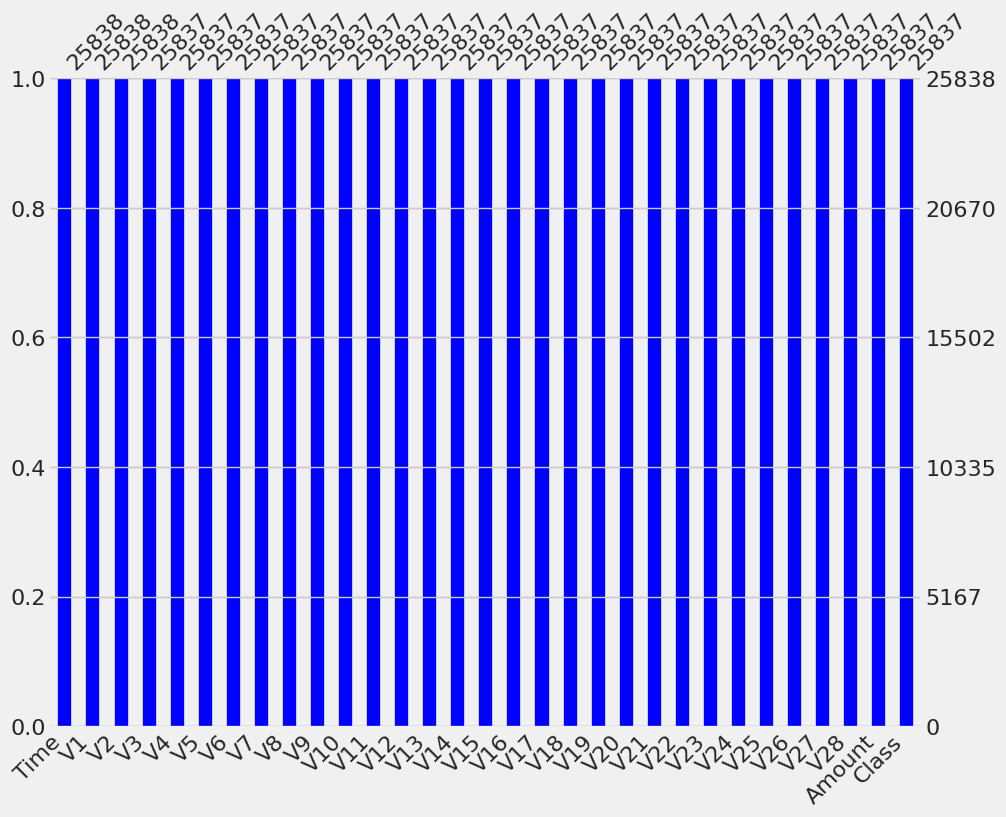

In [14]:
msno.bar(train, color = 'b', figsize = (10,8))


<Axes: >

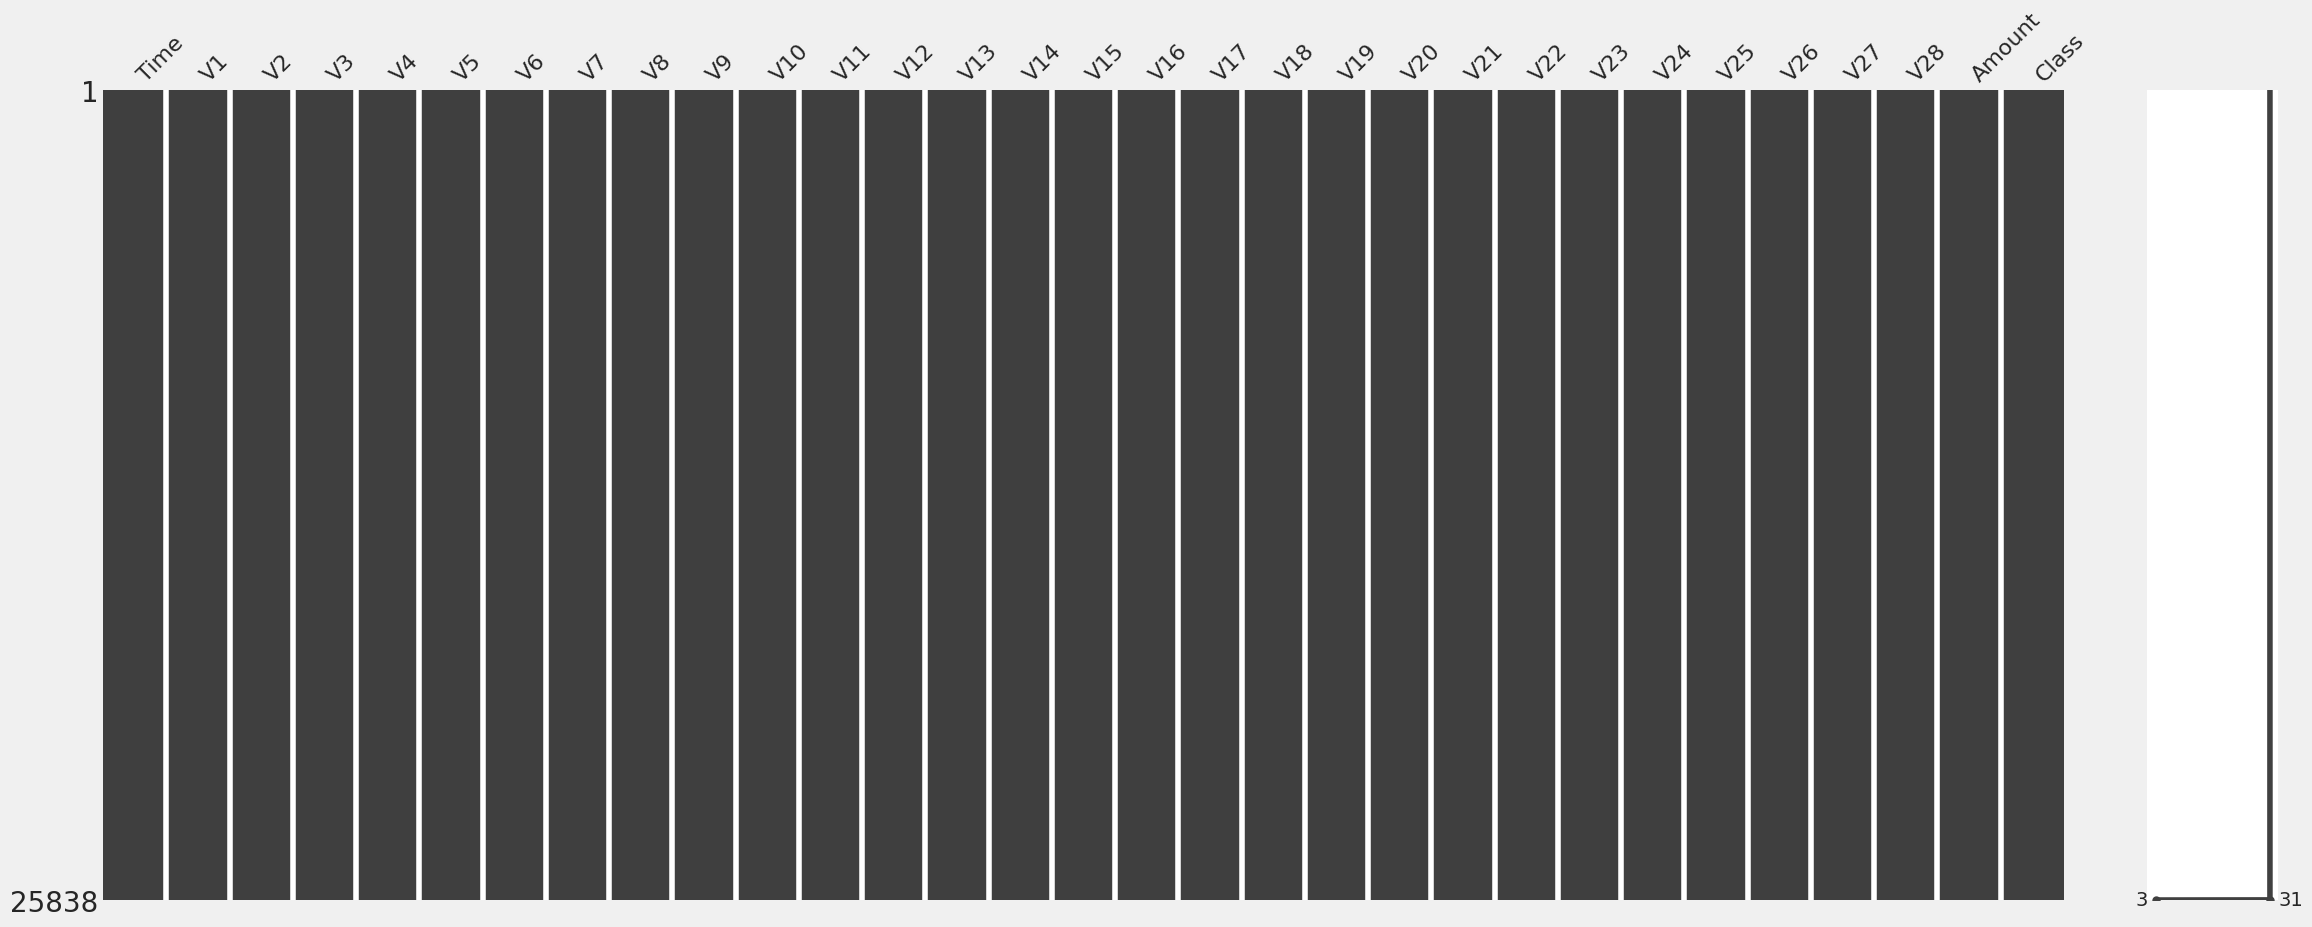

In [15]:
msno.matrix(train)


In [16]:
import random
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# Calculate the count of each class in the target variable
species_count = train['Class'].value_counts()

# Create a bar chart data trace
data = [go.Bar(
    x=species_count.index,
    y=species_count.values,
    marker=dict(color=random_colors(2), line=dict(color='#000000', width=2))
)]

# Define the layout for the bar chart
layout = go.Layout(
    title="Fraudulent VS Non-Fraudulent",
    xaxis=dict(title="Class"),
    yaxis=dict(title="Count")
)

# Create a Figure object and display the chart
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [17]:
trace = go.Pie(labels = list(train.Class.unique()), values = list(train.Class.value_counts()),
                            hole = 0.2,
               marker=dict(colors = random_colors(3),
                           line=dict(color='#000000', width=2)
                           ))
data = [trace]
layout = go.Layout(
   {
      "title":"Fraudlant VS Non- Fraudlant",
   }
)

fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [18]:
import random
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# Create a pie chart data trace
trace = go.Pie(
    labels=list(train.Class.unique()),
    values=list(train.Class.value_counts()),
    hole=0.2,
    marker=dict(colors=random_colors(2), line=dict(color='#000000', width=2))
)

data = [trace]

# Define the layout for the pie chart
layout = go.Layout(
    title="Fraudulent VS Non-Fraudulent Distribution",
)

# Create a Figure object and display the chart
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [19]:
data = [go.Heatmap(z = np.array(train.corr().values),
                   x = np.array(train.corr().columns),
                   y = np.array(train.corr().columns),
                     colorscale='Viridis',)
       ]
layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                            #autosize = False,
                            #height  = 1400,
                            #width   = 1600,
                            margin  = dict(r = 0 ,l = 100,
                                           t = 0,b = 100,
                                         ),
                            yaxis   = dict(tickfont = dict(size = 9)),
                            xaxis   = dict(tickfont = dict(size = 9)),
                           )
                      )

fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [20]:
data = [go.Heatmap(z = np.array(train.corr().values),
                   x = np.array(train.corr().columns),
                   y = np.array(train.corr().columns),
                     colorscale='Viridis',)
       ]
layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                            #autosize = False,
                            #height  = 1400,
                            #width   = 1600,
                            margin  = dict(r = 0 ,l = 100,
                                           t = 0,b = 100,
                                         ),
                            yaxis   = dict(tickfont = dict(size = 9)),
                            xaxis   = dict(tickfont = dict(size = 9)),
                           )
                      )

fig = go.Figure(data=data,layout = layout)
iplot(fig)

In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Load the dataset
train = pd.read_csv("/content/creditcard.csv")

# Separate features (X) and the target variable (y)
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values

# Encode the target variable
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Split the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Handle missing values using SimpleImputer (replace NaN with the mean of the column)
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Initialize and fit the Logistic Regression model
Model = LogisticRegression()
Model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = Model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [22]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13052
           1       0.69      0.56      0.62        48

    accuracy                           1.00     13100
   macro avg       0.85      0.78      0.81     13100
weighted avg       1.00      1.00      1.00     13100

[[13040    12]
 [   21    27]]
accuracy is 0.9974809160305343


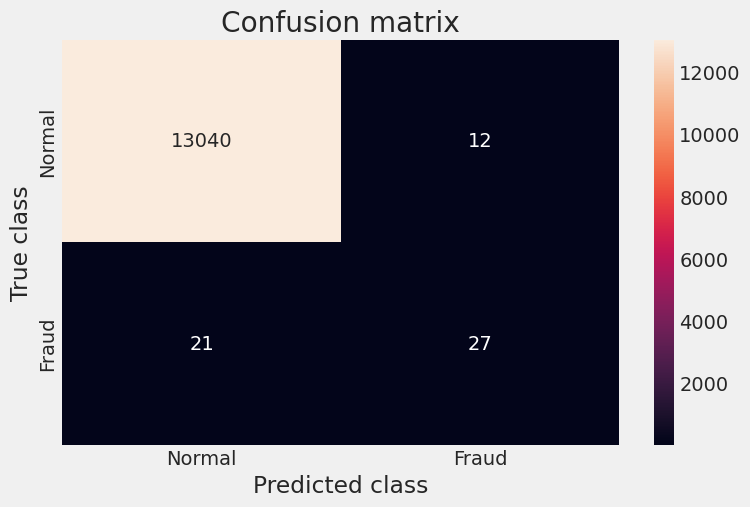

In [23]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [24]:
## Logistic Regression

Model = LogisticRegression()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13052
           1       0.69      0.56      0.62        48

    accuracy                           1.00     13100
   macro avg       0.85      0.78      0.81     13100
weighted avg       1.00      1.00      1.00     13100

[[13040    12]
 [   21    27]]
accuracy is 0.9974809160305343


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



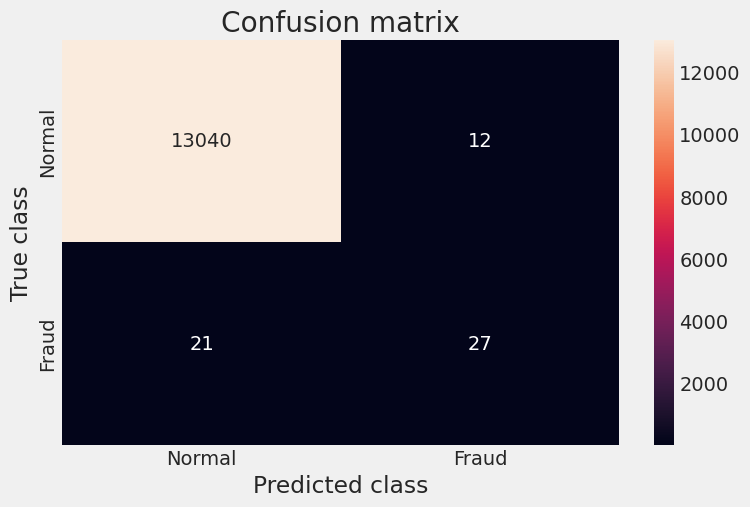

In [25]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [26]:
# K-Nearest Neighbours

Model = KNeighborsClassifier(n_neighbors=8)
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13052
           1       0.00      0.00      0.00        48

    accuracy                           1.00     13100
   macro avg       0.50      0.50      0.50     13100
weighted avg       0.99      1.00      0.99     13100

[[13052     0]
 [   48     0]]
accuracy is 0.9963358778625954


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



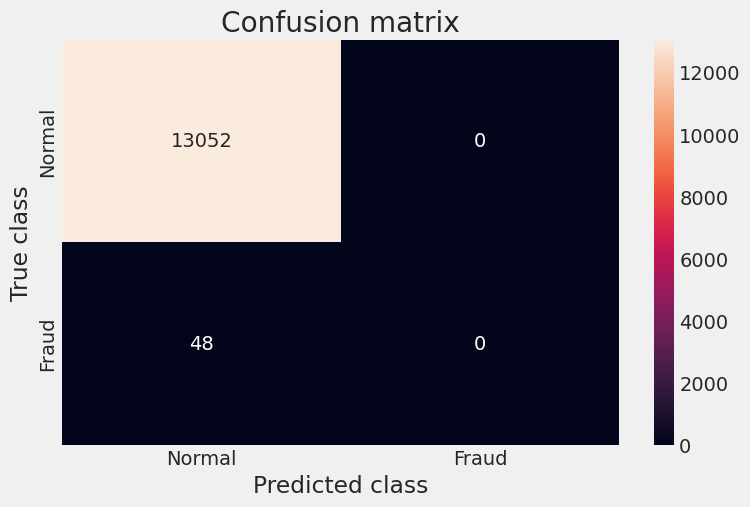

In [27]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [28]:
Model = DecisionTreeClassifier()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13052
           1       0.90      0.77      0.83        48

    accuracy                           1.00     13100
   macro avg       0.95      0.89      0.92     13100
weighted avg       1.00      1.00      1.00     13100

[[13048     4]
 [   11    37]]
accuracy is 0.998854961832061


In [29]:
## MLPClassifier

Model=MLPClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
# Summary of the predictions
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13052
           1       0.66      0.79      0.72        48

    accuracy                           1.00     13100
   macro avg       0.83      0.90      0.86     13100
weighted avg       1.00      1.00      1.00     13100

[[13032    20]
 [   10    38]]
accuracy is  0.9977099236641221


In [30]:
X = train.iloc[:,:-1].values
y = train.iloc[:,-1].values
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [31]:
train.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [32]:
train.head(10)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


In [33]:
class_names={0:'Not Fraud',1:"Fraud"}
print(train.Class.value_counts().rename(index=class_names))

Not Fraud    43529
Fraud          134
Name: Class, dtype: int64
